In [ ]:
from google.colab import drive
drive.mount('/sp')

Mounted at /sp


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("/content/drive/MyDrive/sp/interview_dataset.csv")
print(dataset.head(1))

     treatment company    azimuth  md (ft)  tvd (ft) date on production  \
0  treatment company 1 -32.279999    19148    6443.0         03/01/2018   

   month  year    operator  footage lateral length  well spacing  ...  \
0      1  2018  operator 1                 11966.0     4368.4629  ...   

   p-velocity  s-velocity  youngs modulus    isip  breakdown pressure  \
0    13592.23     6950.44           30.82  4149.0                 NaN   

   pump rate  total number of stages  proppant volume  proppant fluid ratio  \
0         83                      56       21568792.0                  1.23   

    production  
0  5614.947951  

[1 rows x 30 columns]


{'whiskers': [<matplotlib.lines.Line2D at 0x7d463c1d07c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d463c1d0d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d463c1d0640>],
 'medians': [<matplotlib.lines.Line2D at 0x7d463c1d1240>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d463c1d14e0>],
 'means': []}

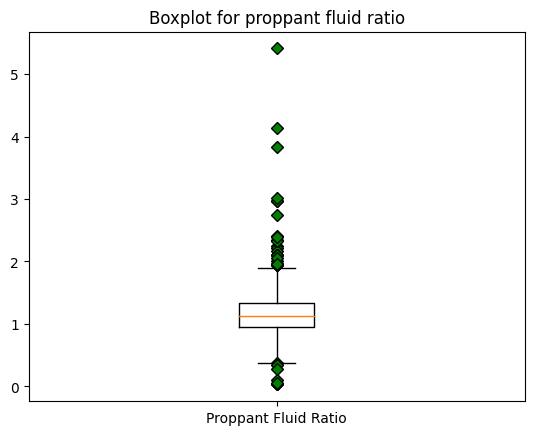

In [ ]:
dataClean = dataset.select_dtypes(np.number).fillna(0) # Fill with Zero NaN values
dataClean = dataClean.reset_index(drop=True)  # Drop all the columns that are not numeric
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot for proppant fluid ratio')
ax.boxplot(dataClean['proppant fluid ratio'], flierprops=green_diamond, labels=["Proppant Fluid Ratio"])

In [ ]:
# Remove outliers
for x in ['proppant fluid ratio']:
    # numpy.percentile() method to calculate the values of Q1 and Q3.
    q75,q25 = np.percentile(dataClean.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    dataClean.loc[dataClean[x] < min,x] = np.nan
    dataClean.loc[dataClean[x] > max,x] = np.nan

dataClean.isnull().sum()

azimuth                    0
md (ft)                    0
tvd (ft)                   0
month                      0
year                       0
footage lateral length     0
well spacing               0
porpoise deviation         0
porpoise count             0
shale footage              0
acoustic impedance         0
log permeability           0
porosity                   0
poisson ratio              0
water saturation           0
toc                        0
vcl                        0
p-velocity                 0
s-velocity                 0
youngs modulus             0
isip                       0
breakdown pressure         0
pump rate                  0
total number of stages     0
proppant volume            0
proppant fluid ratio      33
production                 0
dtype: int64

In [ ]:
#dropping the null values using pandas.dataframe.dropna() function
dataClean = dataClean.dropna(axis = 0)
dataClean.isnull().sum()

azimuth                   0
md (ft)                   0
tvd (ft)                  0
month                     0
year                      0
footage lateral length    0
well spacing              0
porpoise deviation        0
porpoise count            0
shale footage             0
acoustic impedance        0
log permeability          0
porosity                  0
poisson ratio             0
water saturation          0
toc                       0
vcl                       0
p-velocity                0
s-velocity                0
youngs modulus            0
isip                      0
breakdown pressure        0
pump rate                 0
total number of stages    0
proppant volume           0
proppant fluid ratio      0
production                0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7d463c213190>,
 'caps': [<matplotlib.lines.Line2D at 0x7d463c2136d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d463c212ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d463c213c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d463c213eb0>],
 'means': []}

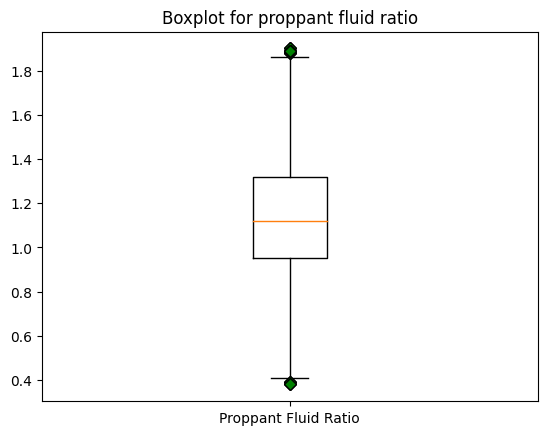

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot for proppant fluid ratio')
ax.boxplot(dataClean['proppant fluid ratio'], flierprops=green_diamond, labels=["Proppant Fluid Ratio"])

<Axes: >

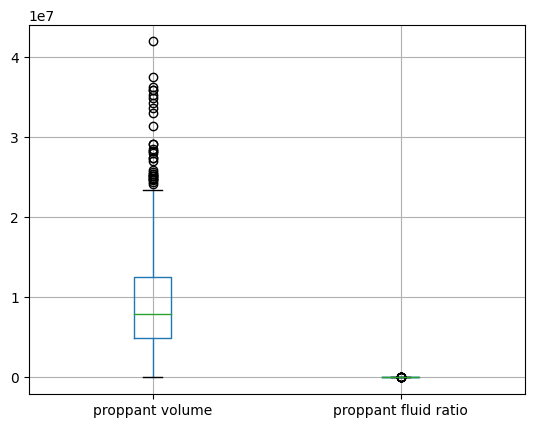

In [ ]:
columns_names = dataClean.columns.values
#print(columns_names)
dataClean.boxplot(list(columns_names[-3:-1]))


In [ ]:
# Remove outliers
for x in ['proppant volume']:
    # numpy.percentile() method to calculate the values of Q1 and Q3.
    q75,q25 = np.percentile(dataClean.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    dataClean.loc[dataClean[x] < min,x] = np.nan
    dataClean.loc[dataClean[x] > max,x] = np.nan


In [ ]:
#dropping the null values using pandas.dataframe.dropna() function
dataClean = dataClean.dropna(axis = 0)
dataClean.isnull().sum()

azimuth                   0
md (ft)                   0
tvd (ft)                  0
month                     0
year                      0
footage lateral length    0
well spacing              0
porpoise deviation        0
porpoise count            0
shale footage             0
acoustic impedance        0
log permeability          0
porosity                  0
poisson ratio             0
water saturation          0
toc                       0
vcl                       0
p-velocity                0
s-velocity                0
youngs modulus            0
isip                      0
breakdown pressure        0
pump rate                 0
total number of stages    0
proppant volume           0
proppant fluid ratio      0
production                0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7d463c0fedd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d463c0ff340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d463c0feb30>],
 'medians': [<matplotlib.lines.Line2D at 0x7d463c0ff880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d463c0ffb20>],
 'means': []}

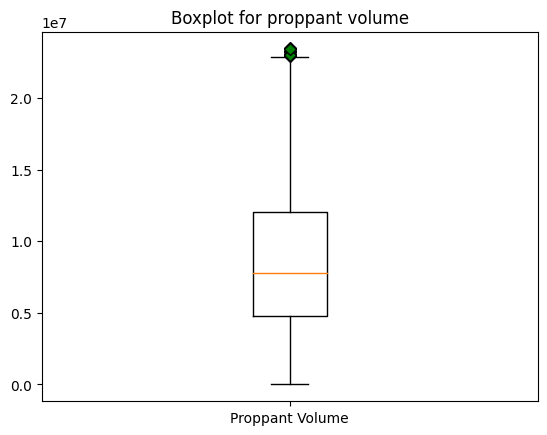

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot for proppant volume')
ax.boxplot(dataClean['proppant volume'], flierprops=green_diamond, labels=["Proppant Volume"])

<Axes: >

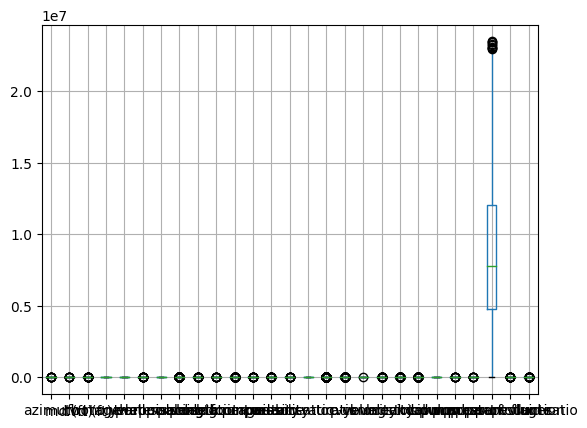

In [ ]:
# BoxPlot all variables
columns_names = dataClean.columns.values
dataClean.boxplot(list(columns_names))


# Correlation Analysis

In [ ]:
#Libraries

# Graphics
from matplotlib import style
import seaborn as sns
# Preprocessing
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from sklearn.model_selection import train_test_split


In [ ]:
# Matplotlib Configuration
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


In [ ]:
# Correlation by Pearson Method
obj = dataClean['production']
ind = dataClean.drop(columns=['production','month','year','footage lateral length']).columns
corr_matrix = dataClean[ind].select_dtypes(include=['float64', 'int']).corr(method='pearson')

#corr_matrix.head(100)
#print(corr_matrix)
corr_matrix = dataClean[ind].corr()
fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(corr_matrix, annot=True);

IndexError: ignored

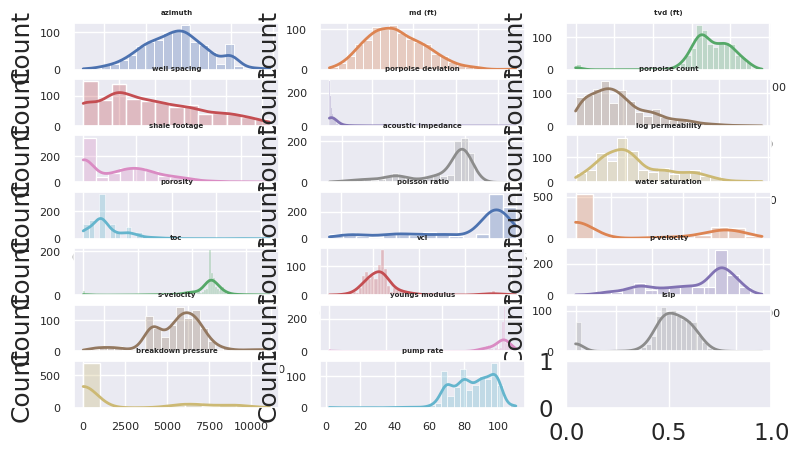

In [ ]:
# Numeric Distribution Variables

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(9, 5))
axes = axes.flat
columns_numeric = dataClean[ind].select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columns_numeric):
    sns.histplot(
        data    = dataClean[ind],
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 5, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")



fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Numeric Variables Distribution', fontsize = 10, fontweight = "bold");

Training score:  0.451149325742923
Testing score:  0.3728167738374014


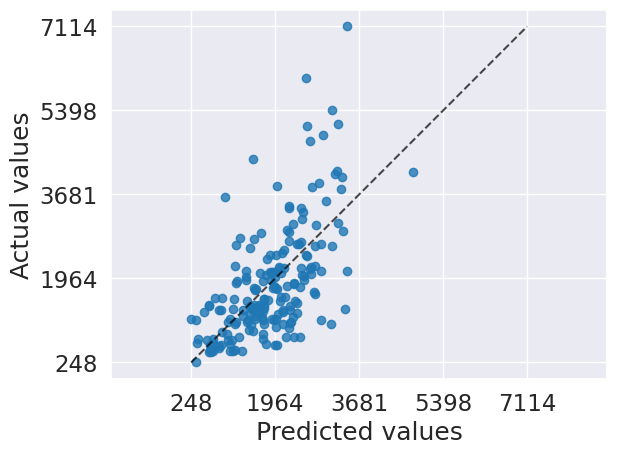

In [ ]:
from sklearn.model_selection import train_test_split

X = dataClean.drop(['production','month','year'], axis=1)
y = dataClean['production']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
model = LinearRegression()
model.fit(X,y)
print('Training score: ',model.score(X_train, y_train))
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
print('Testing score: ', r2_score(y_test, y_pred))

from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred,
                                        kind="actual_vs_predicted")


Training score:  0.4254484081033263
Testing score:  0.30862825040083597


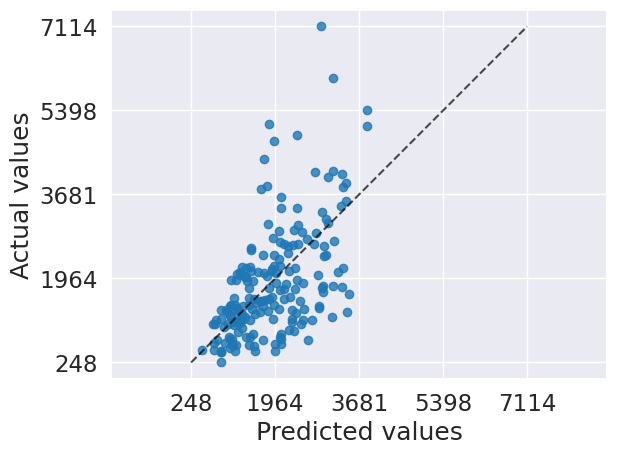

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X,y)
print('Training score: ',model.score(X_train, y_train))
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
print('Testing score: ', r2_score(y_test, y_pred))

from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred,
                                        kind="actual_vs_predicted")

Training score:  0.44210808393662415
Testing score:  0.36501795323004904


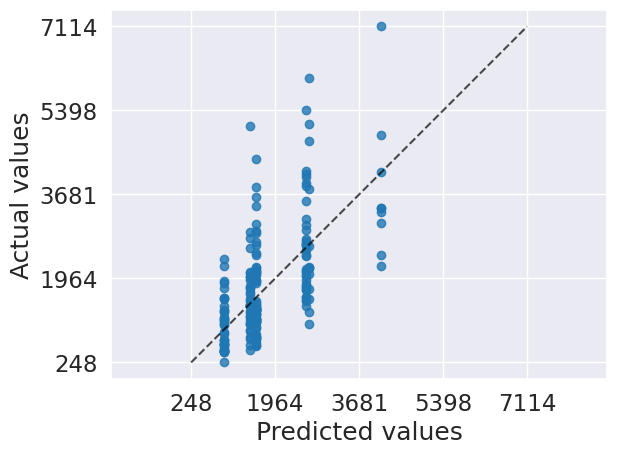

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3, random_state=123)
model.fit(X,y)
print('Training score: ',model.score(X_train, y_train))
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
print('Testing score: ', r2_score(y_test, y_pred))

from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred,
                                        kind="actual_vs_predicted")